##### 1. Import libraries and functions

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from linearmodels.panel import PanelOLS
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
import statsmodels.formula.api as smf


from binned_regression import *
from chicago_ridesharing_functions import *

##### 2. Specify arguments
<small>

1. **level** (str) : "PU" or "DO" 
2. **temp_bin_size** (int) : Size of the temperature bin
3. **subset** (str) : "FHV" or "YG" . For Hire Vehicle or Medallion Taxi subset
4. **income_split**(str) : Default: None . Options: "q25","q50","q75","q100"
5. **workday_split**(str) : Default: None. Options: "weekday","weekend"
6. **temp_split**(str): Default: None. Options: "q1","q2","q3","q4"
7. **exclude_minimum_bin**(Bool): If True temp bins with less than 1\% coverage are excluded
8. **daytime**(str) : Default: None. If "day" - trip counts only consist of trips between 8am and 8pm
9. **hotel_control**(Bool): If True monthly hotel occupancy is controlled for
10. **exclude_zeros**(Bool): If True observations (day-zone-pairs) with zero rides are excluded.
<small>


In [2]:
level = "PU"
temp_bin_size = 3  # still have to adjust estimation and plotting function for other bin sizes
subset = "FHV"
income_split = None
workday_split = None
temp_split = None
exclude_minimum_bin = True
daytime = "day"
hotel_control = False
exclude_zeros = False

##### 3. Run Panel Regression (OLS: linearmodels)

In [15]:
data = binned_regression_data(level = level,temp_bin_size = temp_bin_size,subset = subset, income_split = income_split , workday_split = workday_split, temp_split = temp_split, exclude_minimum_bin = exclude_minimum_bin , daytime = daytime , hotel_control = hotel_control , exclude_zeros = exclude_zeros)

In [4]:
results = binned_regression(panel_data = data , level = level, workday_split = workday_split, exclude_zeros = False)

c:\Anaconda\anaconda3\envs\dl_intro\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


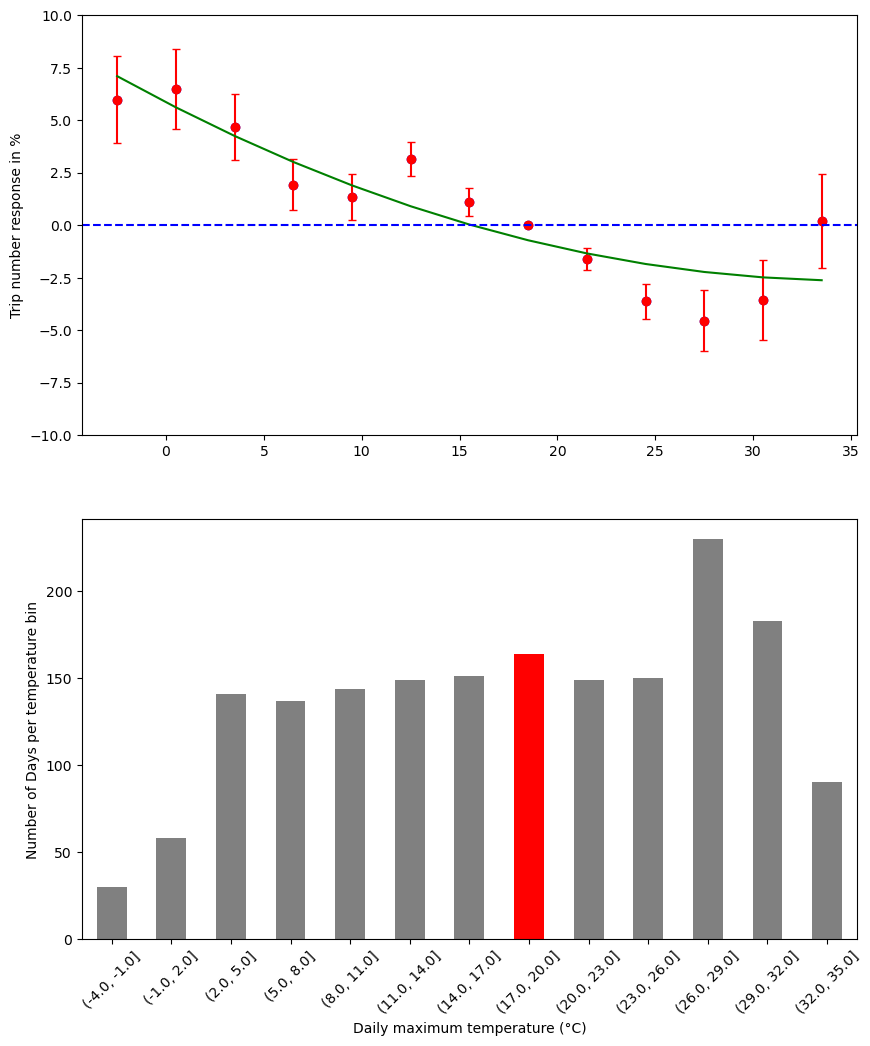

In [5]:
binned_regression_plots(results = results, panel_data = data , temp_bin_size = temp_bin_size)

##### 4. Poisson Estimation

In [12]:
results_poisson = binned_regression_poisson(panel_data = data , level = level, workday_split = workday_split)

Optimization terminated successfully.
         Current function value: 44.391854
         Iterations 12


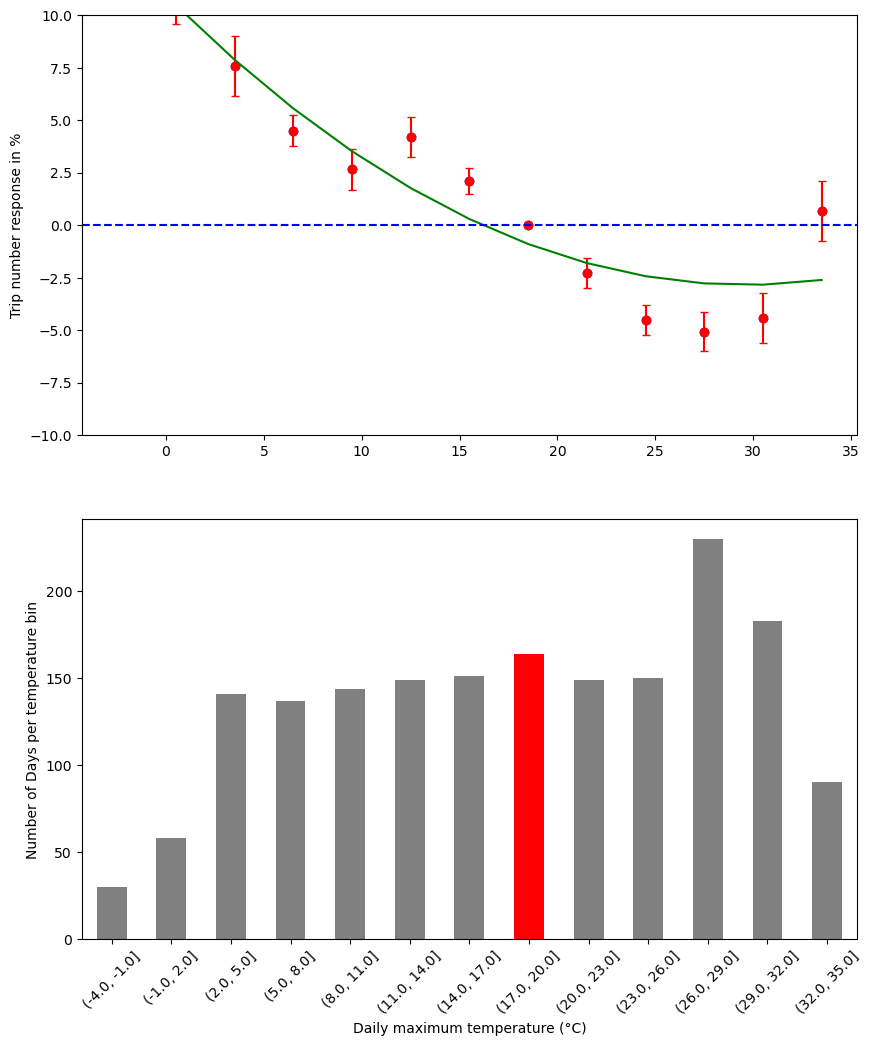

In [13]:
binned_regression_plots(results = results_poisson, panel_data = data , temp_bin_size = temp_bin_size)

##### 5. Chicago Ridesharing

                          PanelOLS Estimation Summary                           
Dep. Variable:         log_trip_count   R-squared:                        0.0614
Estimator:                   PanelOLS   R-squared (Between):           -2.22e-16
No. Observations:              107723   R-squared (Within):               0.2995
Date:                Thu, Mar 21 2024   R-squared (Overall):              0.0194
Time:                        14:00:46   Log-likelihood                    9743.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      293.45
Entities:                          77   P-value                           0.0000
Avg Obs:                       1399.0   Distribution:               F(24,107618)
Min Obs:                       1399.0                                           
Max Obs:                       1399.0   F-statistic (robust):             434.85
                            

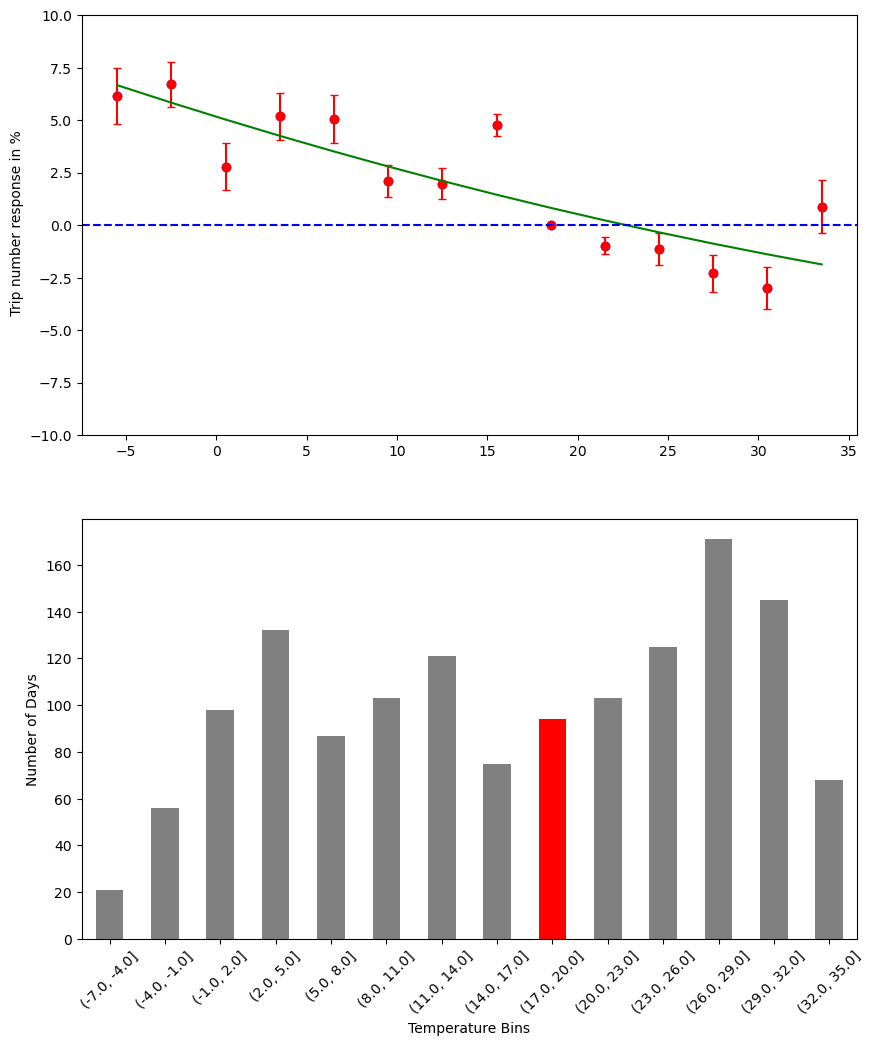

In [7]:
chicago_binned_regression("trip_number",3, exclude_2020 = True)